<a href="https://colab.research.google.com/github/s-mostafa-a/visualizing-medical-data/blob/master/RSNA_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!echo '{"username":"smostafaa","key":"1b97f3d8b9e3ae3cf4ef2691fabea67c"}' > ./kaggle.json
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c rsna-pneumonia-detection-challenge

  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 42.0MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 51.7MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 49.4MB/s]
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 38.4MB/s]
  0% 0.00/153k [00:00<?, ?B/s]
100% 153k/153k [00:00<00:00, 48.1MB/s]
  0% 0.00/133k [00:00<?, ?B/s]
100% 133k/133k [00:00<00:00, 41.0MB/s]
  0% 0.00/109k [00:00<?, ?B/s]
100% 109k/109k [00:00<00:00, 110MB/s]
  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 105MB/s]
  0% 0.00/92.5k [00:00<?, ?B/s]
100% 92.5k/92.5k [00:00<00:00, 95.7MB/s]
  0% 0.00/169k [00:00<?, ?B/s]
100% 169k/169k [00:00<00:00, 56.0MB/s]
  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 108MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 97.4MB/s]
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 126MB/s]
  0% 0.00/116k [00:00<?, ?B/s]
100% 116k/116k [00:00<00:00, 101MB/s]
  0% 0.00/158k [00:00<

In [2]:
!mkdir training_data
!mv *.dcm training_data/

In [3]:
!unzip stage_2_train_labels.csv.zip -d stage_2_train_labels
!mv ./stage_2_train_labels/stage_2_train_labels.csv ./stage_2_train_labels.csv

Archive:  stage_2_train_labels.csv.zip
  inflating: stage_2_train_labels/stage_2_train_labels.csv  


In [4]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 89kB/s 


In [5]:
from fastai.vision import *

In [6]:
from fastai.vision import Image
from fastai.vision import pil2tensor
from pydicom import dcmread
import numpy as np
import PIL
def open_dcm_image(fn:PathOrStr, div:bool=True, convert_mode:str='RGB', cls:type=Image,
        after_open:Callable=None)->Image:
    "Return `Image` object created from image in file `fn`."
    print(fn)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning) # EXIF warning from TiffPlugin
        #x= PIL.Image.open(fn).convert(convert_mode)
        # code added for opening dcm images
        array = dcmread(fn).pixel_array
        x = PIL.Image.fromarray(array).convert(convert_mode)
    if after_open: x = after_open(x)
    x = pil2tensor(x,dtype=np.float32)
    if div: x.div_(255)
    return cls(x)
  
vision.data.open_image = open_dcm_image

In [7]:
import os
file_names = []
for root, dirs, files in os.walk("./training_data"):
    for filename in files:
        file_names.append(filename.split('.')[0])
print(file_names)

['00100a24-854d-423d-a092-edcf6179e061', '00330f7f-d114-4eb2-9c6e-558eeb3084a1', '003ec9e3-512e-4f6e-923d-daa9f9f3db9a', '003dba79-1b1d-4713-add8-d72c54074f8a', '002c591d-df62-4e34-8eda-838c664430a9', '000e3a7d-c0ca-4349-bb26-5af2d8993c3d', '00293de0-a530-41dc-9621-0b3def01d06d', '001031d9-f904-4a23-b3e5-2c088acd19c6', '000fe35a-2649-43d4-b027-e67796d412e0', '0022073f-cec8-42ec-ab5f-bc2314649235', '001b0c51-c7b3-45c1-9c17-fa7594cab96e', '000924cf-0f8d-42bd-9158-1af53881a557', '0041fc67-793c-4129-a952-ea3fb821b445', '0015597f-2d69-4bc7-b642-5b5e01534676', '002cb550-2e31-42f1-a29d-fbc279977e71', '0000a175-0e68-4ca4-b1af-167204a7e0bc', '0053ee32-1e03-4dc2-a103-f46ad0448787', '0028450f-5b8e-4695-9416-8340b6f686b0', '000686d7-f4fc-448d-97a0-44fa9c5d3aa6', '003d17f0-bd8a-485c-bc8b-daec33f53efa', '002fcb77-ef76-4626-ab34-5070f15c20db', '003d8fa0-6bf1-40ed-b54c-ac657f8495c5', '0022995a-45eb-4cfa-9a59-cd15f5196c64', '001916b8-3d30-4935-a5d1-8eaddb1646cd', '0022bb50-bf6c-4185-843e-403a9cc1ea80',

In [8]:
import pandas as pd
df = pd.read_csv('/content/stage_2_train_labels.csv')
df2 = df.loc[df['patientId'].isin(file_names)]
df2.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [13]:

data = (ImageList.from_df(df=df2, path='/content',
                              folder='training_data',
                              suffix='.dcm')
        .split_by_rand_pct()
        .label_from_df(cols='Target')
        .transform(get_transforms(), size=224)
        .databunch(bs=3))

/content/training_data/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
/content/training_data/0010f549-b242-4e94-87a8-57d79de215fc.dcm
/content/training_data/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
/content/training_data/000db696-cf54-4385-b10b-6b16fbb3f985.dcm
/content/training_data/000db696-cf54-4385-b10b-6b16fbb3f985.dcm
/content/training_data/00569f44-917d-4c86-a842-81832af98c30.dcm


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/content/training_data/00436515-870c-4b36-a041-de91049b9ab4.dcm
/content/training_data/000db696-cf54-4385-b10b-6b16fbb3f985.dcm
/content/training_data/001916b8-3d30-4935-a5d1-8eaddb1646cd.dcm


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

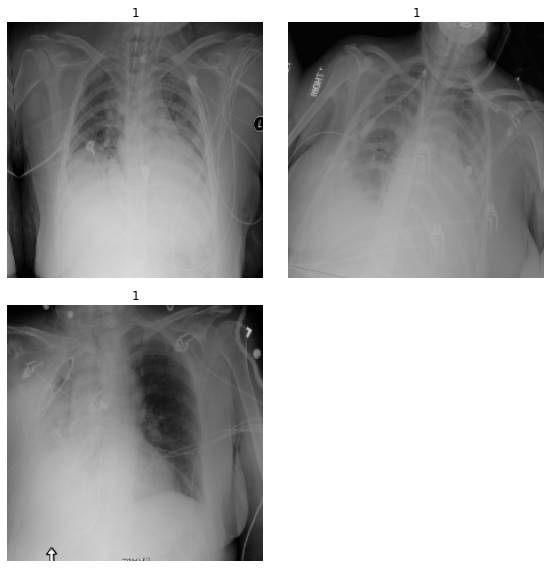

In [14]:
data.show_batch()